In [1]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/carlosvelazquez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosvelazquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!pip install seaborn
import seaborn as sns

In [3]:
conda install pandas

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/carlosvelazquez/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.11.1              |  py311hca03da5_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following packages will be UPDATED:

  conda                             24.11.0-py311hca03da5_0 --> 24.11.1-py311hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
url = "https://raw.githubusercontent.com/cgvelazquez0414/steam_games/main/gaming_ds_proj_1.csv"
game = pd.read_csv(url)


In [5]:
#counting all NA's
na_counts = game.isna().sum()

# Display total number of NA and NaN values in the entire dataset
total_na = game.isna().sum().sum()

print("NA/NaN counts per column:\n", na_counts)
print("\nTotal NA/NaN values in the dataset:", total_na)

#using range() to assign a id number for every row
game['app_id'] = range(1, len(game) + 1)

#converting format and dropping observations not released yet
game['release_date'] = pd.to_datetime(game['release_date'], errors='coerce')
game = game.dropna(subset=['release_date'])

#dropping observations containing more than 3 Na's in a observations
game = game.dropna(thresh=len(game.columns) - 3)

# Replace NaN values in the 'genre' column with "Action, Adventure, Indie"
game['genres'] = game['genres'].fillna("Action, Adventure, Indie")

# Replace NaN values in the 'developer' column with "Tero Lunkka"
game['developer'] = game['developer'].fillna("Tero Lunkka")

# Replace NaN values in the 'publisher' column with "Hede"
game['publisher'] = game['publisher'].fillna("Hede")

#replaceing NaN's with median
median_review_pct = game['overall_review_%'].median()
game['overall_review_%'] = game['overall_review_%'].fillna(median_review_pct)

#replaceing NaN's with median
median_review_count = game['overall_review_count'].median()
game['overall_review_count'] = game['overall_review_count'].fillna(median_review_count)


NA/NaN counts per column:
 app_id                    0
title                     0
release_date              3
genres                   15
categories                7
developer                19
publisher                19
original_price            0
discount_percentage       0
discounted_price          0
dlc_available             0
age_rating                0
win_support               0
mac_support               0
linux_support             0
awards                    0
overall_review_%        534
overall_review_count    534
dtype: int64

Total NA/NaN values in the dataset: 1131


/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/1745721890.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game['release_date'] = pd.to_datetime(game['release_date'], errors='coerce')


In [6]:
#counting all NA's
na_counts = game.isna().sum()

# Display total number of NA and NaN values in the entire dataset
total_na = game.isna().sum().sum()

print("NA/NaN counts per column:\n", na_counts)
print("\nTotal NA/NaN values in the dataset:", total_na)

NA/NaN counts per column:
 app_id                  0
title                   0
release_date            0
genres                  0
categories              0
developer               0
publisher               0
original_price          0
discount_percentage     0
discounted_price        0
dlc_available           0
age_rating              0
win_support             0
mac_support             0
linux_support           0
awards                  0
overall_review_%        0
overall_review_count    0
dtype: int64

Total NA/NaN values in the dataset: 0


In [7]:
#converting original price to dollar
conversion_rate = 0.012

# Remove the ₹ symbol and commas, then convert to float
game['original_price'] = game['original_price'].replace('[₹,]', '', regex=True).astype(float)

# Convert INR to USD
game['original_price_usd'] = game['original_price'] * conversion_rate

#converting discounted price to dollar
# Remove the ₹ symbol and commas, then convert to float
game['discounted_price'] = game['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# Convert INR to USD
game['discounted_price_usd'] = game['discounted_price'] * conversion_rate

In [8]:
#downloading reviews
path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

print("Path to dataset files:", path)

Path to dataset files: /Users/carlosvelazquez/.cache/kagglehub/datasets/najzeko/steam-reviews-2021/versions/1


In [9]:
import os

dataset_path = "/Users/carlosvelazquez/.cache/kagglehub/datasets/najzeko/steam-reviews-2021/versions/1"

if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print("Files in the dataset directory:", files)
else:
    print("The specified dataset path does not exist.")

Files in the dataset directory: ['steam_reviews.csv']


In [10]:
file_name = "steam_reviews.csv" 
file_path = os.path.join(dataset_path, file_name)

df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0  app_id                  app_name  review_id  language  \
0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3           3  292030  The Witcher 3: Wild Hunt   85184605   english   
4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review  timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了         1611381629   
1                                 拔DIAO无情打桩机--杰洛特!!!         1611381030   
2                                              巫师3NB         1611380800   
3  One of the best RPG's of all time, worthy of a...         1611379970   
4                                                 大作         1611379427   

   timestamp_updated  recommended  votes_helpful  ...  steam_purchase  \
0         1611381629         True          

In [11]:
merged_df = pd.merge(df, game, left_on="app_name", right_on="title", how="inner")

#filter merged_df with only english
merged_df_1 = merged_df[merged_df["language"] == "english"]

# Display the first five rows of the filtered dataframe
print(merged_df_1)

         Unnamed: 0  app_id_x          app_name  review_id language  \
0            668297       620          Portal 2   84747005  english   
1            668298       620          Portal 2   84746899  english   
3            668300       620          Portal 2   84745859  english   
6            668303       620          Portal 2   84744152  english   
7            668304       620          Portal 2   84743991  english   
...             ...       ...               ...        ...      ...   
2767196    21645820    512900  Streets of Rogue   30438766  english   
2767200    21645824    512900  Streets of Rogue   85149009  english   
2767203    21645827    512900  Streets of Rogue   85208044  english   
2767206    21645830    512900  Streets of Rogue   85187860  english   
2767208    21645832    512900  Streets of Rogue   85179148  english   

                                                    review  timestamp_created  \
0        BEST GAME I HAVE EVER PLAYED!!!! (except: Mine...        

In [14]:
filtered_df = merged_df_1[pd.to_datetime(merged_df_1['release_date']) > pd.Timestamp('2013-12-31')]

In [18]:
developers_to_count = [
    "Rockstar North",
    "Bethesda Game Studios",
    "CREATIVE ASSEMBLY",
    "Ninja Kiwi",
    "Mega Crit"
]

filtered_developers_df = filtered_df[filtered_df['developer'].isin(developers_to_count)].reset_index(drop=True)

In [19]:
developer_counts_all = filtered_developers_df['developer'].value_counts()

developer_counts_all

developer
Rockstar North           319751
Bethesda Game Studios     84628
CREATIVE ASSEMBLY         73091
Ninja Kiwi                42070
Mega Crit                 41684
Name: count, dtype: int64

In [21]:
filtered_data = filtered_df[filtered_df['developer'].isin(developers_to_count)]

# Randomly sample 40,000 observations for each developer in developers_to_count
sampled_developers_df = (
    filtered_data.groupby('developer', group_keys=False)
    .apply(lambda x: x.sample(n=min(40000, len(x)), replace=True, random_state=42))
    .reset_index(drop=True)
)

/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/315875220.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(40000, len(x)), replace=True, random_state=42))


In [22]:
app_name_counts = sampled_developers_df['app_name'].value_counts().reset_index()

# Rename the columns for clarity
app_name_counts.columns = ['app_name', 'count']

# Display the resulting table
print(app_name_counts)

                                      app_name  count
0  The Elder Scrolls V: Skyrim Special Edition  40000
1                               Slay the Spire  40000
2                                  Bloons TD 6  40000
3                           Grand Theft Auto V  40000
4                      Total War: WARHAMMER II  26291
5                         Total War: WARHAMMER  13709


In [23]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sample dataframe (replace with your actual DataFrame)
# Example: sampled_developers_df = pd.read_csv("your_dataset.csv")

# Define a function to calculate sentiment scores and label
def get_sentiment_scores(review):
    scores = sia.polarity_scores(str(review))
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([compound, scores['neg'], scores['neu'], scores['pos'], sentiment])

# Apply the function to calculate scores and sentiment
sampled_developers_df[['compound', 'neg', 'neu', 'pos', 'sentiment']] = sampled_developers_df['review'].apply(get_sentiment_scores)

# Display the first few observations with their sentiment scores and labels
result_df = sampled_developers_df[['review', 'compound', 'neg', 'neu', 'pos', 'sentiment']].head()
print(result_df)

                                              review  compound    neg    neu  \
0                       10/10\nDefined a generation.    0.0000  0.000  1.000   
1                                          good game    0.4404  0.000  0.256   
2  -comes with the same exact shitty gameplay exc...    0.8406  0.078  0.766   
3                              Yeeeeeeeeeeeeeeeeeeet    0.0000  0.000  1.000   
4                    ME ME LIKE SWORD OF BIG LAD MAN    0.3612  0.000  0.737   

     pos sentiment  
0  0.000   Neutral  
1  0.744  Positive  
2  0.156  Positive  
3  0.000   Neutral  
4  0.263  Positive  


In [24]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess the review and include stopwords
def preprocess_text_with_stopwords(text):
    # Convert to string in case of NaN or non-string values
    text = str(text)
    words = text.split()
    # Reconstruct the text to ensure stopwords are retained
    return ' '.join(words)

# Preprocess the reviews to include stopwords explicitly
sampled_developers_df['review_with_stopwords'] = sampled_developers_df['review'].apply(preprocess_text_with_stopwords)

# Function to calculate sentiment scores and sentiment label
def get_sentiment_scores(review):
    scores = sia.polarity_scores(str(review))
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([compound, scores['neg'], scores['neu'], scores['pos'], sentiment])

# Apply the sentiment analysis to the processed reviews
sampled_developers_df[['compound', 'neg', 'neu', 'pos', 'sentiment']] = sampled_developers_df['review_with_stopwords'].apply(get_sentiment_scores)

# Display the first few observations with their sentiment scores and labels
result_df = sampled_developers_df[['review', 'compound', 'neg', 'neu', 'pos', 'sentiment']]
print(result_df)

                                                   review  compound    neg  \
0                            10/10\nDefined a generation.    0.0000  0.000   
1                                               good game    0.4404  0.000   
2       -comes with the same exact shitty gameplay exc...    0.8406  0.078   
3                                   Yeeeeeeeeeeeeeeeeeeet    0.0000  0.000   
4                         ME ME LIKE SWORD OF BIG LAD MAN    0.3612  0.000   
...                                                   ...       ...    ...   
199995  No one wants to buy sharkcards. GTA Online is ...   -0.2960  0.155   
199996                the most chill game u can ever play    0.3400  0.000   
199997              Love it, Best MMO I have ever played.    0.8957  0.000   
199998  I love Grand Theft Auto V\ncuz the game is coo...    0.9324  0.000   
199999  We bought this game on PC for one reason. Sing...   -0.7906  0.304   

          neu    pos sentiment  
0       1.000  0.000   Neutral

In [27]:
sampled_developers_df_cleaned = sampled_developers_df.dropna()

# Calculate sentiment_score using positive and negative scores
sampled_developers_df_cleaned['sentiment_score'] = (
    sampled_developers_df_cleaned['pos'] - sampled_developers_df_cleaned['neg']
)

/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/1058135572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_developers_df_cleaned['sentiment_score'] = (


,Unnamed: 0,app_id_x,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,overall_review_count,original_price_usd,discounted_price_usd,compound,neg,neu,pos,sentiment,review_with_stopwords,sentiment_score
0,19986099,489830,The Elder Scrolls V: Skyrim Special Edition,73780180,english,10/10\nDefined a generation.,1596586347,1596586347,True,0,...,160313.0,21.588,4.308,0.0000,0.000,1.000,0.000,Neutral,10/10 Defined a generation.,0.000
1,19961594,489830,The Elder Scrolls V: Skyrim Special Edition,84599359,english,good game,1610526175,1610526175,True,0,...,160313.0,21.588,4.308,0.4404,0.000,0.256,0.744,Positive,good game,0.744
2,20090213,489830,The Elder Scrolls V: Skyrim Special Edition,26464208,english,-comes with the same exact shitty gameplay exc...,1478465537,1478466083,True,1,...,160313.0,21.588,4.308,0.8406,0.078,0.766,0.156,Positive,-comes with the same exact shitty gameplay exc...,0.078
3,20049371,489830,The Elder Scrolls V: Skyrim Special Edition,46383053,english,Yeeeeeeeeeeeeeeeeeeet,1542905980,1542905980,True,0,...,160313.0,21.588,4.308,0.0000,0.000,1.000,0.000,Neutral,Yeeeeeeeeeeeeeeeeeeet,0.000
4,19970411,489830,The Elder Scrolls V: Skyrim Special Edition,80748147,english,ME ME LIKE SWORD OF BIG LAD MAN,1606520490,1606520490,True,0,...,160313.0,21.588,4.308,0.3612,0.000,0.737,0.263,Positive,ME ME LIKE SWORD OF BIG LAD MAN,0.263


/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/2023520281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_developers_df_cleaned['sentiment_score_percentage'] = sampled_developers_df_cleaned['sentiment_score'] * 100


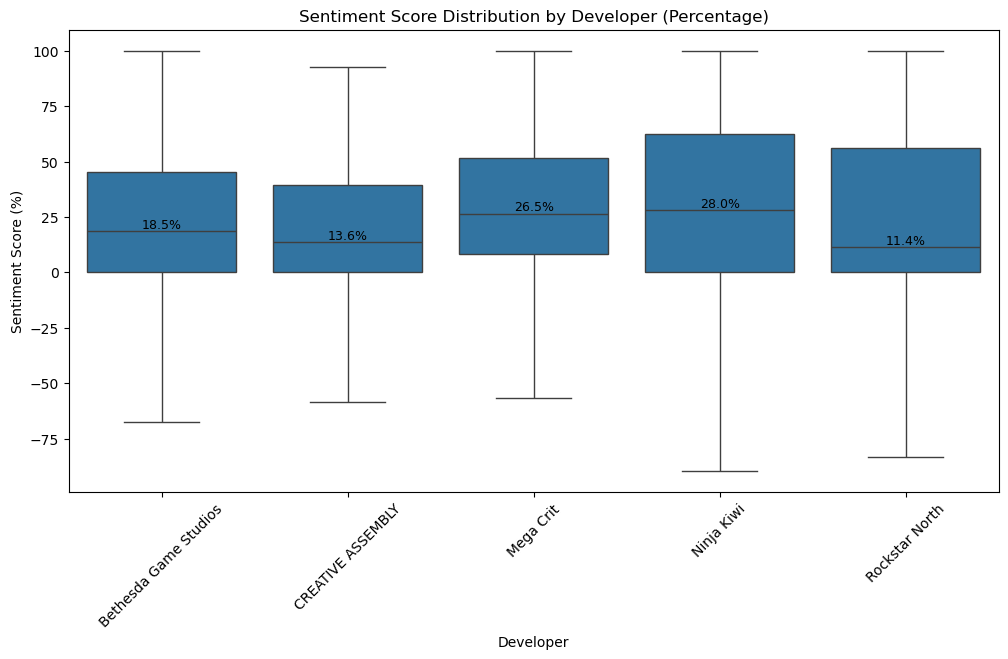

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sentiment_score to percentage
sampled_developers_df_cleaned['sentiment_score_percentage'] = sampled_developers_df_cleaned['sentiment_score'] * 100

# Create the boxplot with sentiment_score as percentage
plt.figure(figsize=(12, 6))
sns.boxplot(data=sampled_developers_df_cleaned, x='developer', y='sentiment_score_percentage', showfliers=False)

# Add labels for each boxplot (median value in percentage)
for developer in sampled_developers_df_cleaned['developer'].unique():
    median_val = sampled_developers_df_cleaned[sampled_developers_df_cleaned['developer'] == developer]['sentiment_score_percentage'].median()
    x_pos = sampled_developers_df_cleaned['developer'].unique().tolist().index(developer)
    plt.text(x_pos, median_val, f'{median_val:.1f}%', 
             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=9)

# Customize the plot
plt.title('Sentiment Score Distribution by Developer (Percentage)')
plt.xlabel('Developer')
plt.ylabel('Sentiment Score (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

# Prep for Neural Network Classification--------------------

In [30]:
pd.set_option('display.max_columns', None)


# Specify the columns to include in the new DataFrame
selected_columns = [
    "steam_purchase", "review", "recommended", "received_for_free",
    "written_during_early_access", "genres", "categories", "developer",
    "publisher", "discount_percentage", "dlc_available", "age_rating",
    "win_support", "mac_support", "linux_support", "awards",
    "overall_review_%", "overall_review_count", "original_price_usd",
    "discounted_price_usd"
]

# Create the new DataFrame with the selected columns
nn_1 = merged_df_1[selected_columns]

In [31]:
# Remove rows with any NaN values in the DataFrame
nn_2 = nn_1.dropna()

#counting unique inputs
unique_counts = nn_2['steam_purchase'].value_counts()

print(unique_counts)


steam_purchase
True     851176
False    250261
Name: count, dtype: int64


In [32]:
nn_2

# Convert True to 1 and False to 0 for specified columns
boolean_columns = [
    "steam_purchase", "recommended", "received_for_free", 
    "written_during_early_access", "win_support", 
    "mac_support", "linux_support"
]

# Convert boolean values to integers
nn_2[boolean_columns] = nn_2[boolean_columns].astype(int)

# Create a new column `review_length` counting the number of characters in the `review` column
nn_2['review_length'] = nn_2['review'].str.len()
nn_2['genre_length'] = nn_2['genres'].str.len()
nn_2['categories_length'] = nn_2['categories'].str.len()

# Remove the specified columns from the DataFrame
nn_2 = nn_2.drop(columns=['review', 'genres', 'categories'])


/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/2163850081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_2[boolean_columns] = nn_2[boolean_columns].astype(int)
/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/2163850081.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_2['review_length'] = nn_2['review'].str.len()
/var/folders/9f/g3mh126s0s546sbywzbxhf2h0000gn/T/ipykernel_2625/2163850081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [33]:
# Define the two lists
developers = [
    'Valve', 'Ghost Town Games Ltd.', 'Eidos Interactive Corp.', 'Relic Entertainment',
    'Gadget Games', 'Thomas Happ Games LLC', 'Team Meat', 'Mega Crit', 'SCS Software',
    'BANDAI NAMCO Studios Inc.', 'Subset Games', 'Fatshark', 'Gearbox Software',
    'Landfall', 'Ninja Kiwi', 'Hempuli Oy', 'Oskar Stålberg', 'Irrational Games',
    'Suspicious Developments', 'Rockstar North', 'CREATIVE ASSEMBLY',
    'Monolith Productions', 'Crytek', 'Bethesda Game Studios', 'Flashbulb',
    'Total Mayhem Games', 'Bulwark Studios', 'Stumpy🐙Squid', 'Frontier Developments',
    'Eight Points', 'Matt Dabrowski'
]

publishers = [
    'Valve', 'Team17', 'Eidos Interactive Corp.', 'SEGA', 'My Way Games',
    'Thomas Happ Games LLC', 'Team Meat', 'Mega Crit', 'SCS Software',
    'BANDAI NAMCO Entertainment', 'Subset Games', 'Fatshark', '2K', 'Landfall',
    'Ninja Kiwi', 'Hempuli Oy', 'Raw Fury', 'Suspicious Developments',
    'Rockstar Games', 'WB Games', 'Crytek', 'Bethesda Softworks', 'Flashbulb',
    'Total Mayhem Games', 'Kasedo Games', 'Frontier Developments',
    'HypeTrain Digital', 'tinyBuild'
]

# Combine the two lists and map names to unique numbers
unique_names = list(set(developers + publishers))
name_to_number = {name: i for i, name in enumerate(unique_names)}

# Map the numbers to the original lists
developers_mapped = [name_to_number[name] for name in developers]
publishers_mapped = [name_to_number[name] for name in publishers]

# Display the mappings
print("Mapping of Developers:", developers_mapped)
print("Mapping of Publishers:", publishers_mapped)
print("Name to Number Dictionary:", name_to_number)

Mapping of Developers: [2, 19, 32, 30, 21, 34, 24, 37, 35, 11, 12, 42, 13, 38, 26, 31, 17, 18, 27, 23, 41, 39, 3, 8, 7, 40, 4, 33, 20, 6, 1]
Mapping of Publishers: [2, 36, 32, 14, 9, 34, 24, 37, 35, 25, 12, 42, 28, 38, 26, 31, 15, 27, 29, 5, 3, 10, 7, 40, 16, 20, 22, 0]
Name to Number Dictionary: {'tinyBuild': 0, 'Matt Dabrowski': 1, 'Valve': 2, 'Crytek': 3, 'Bulwark Studios': 4, 'WB Games': 5, 'Eight Points': 6, 'Flashbulb': 7, 'Bethesda Game Studios': 8, 'My Way Games': 9, 'Bethesda Softworks': 10, 'BANDAI NAMCO Studios Inc.': 11, 'Subset Games': 12, 'Gearbox Software': 13, 'SEGA': 14, 'Raw Fury': 15, 'Kasedo Games': 16, 'Oskar Stålberg': 17, 'Irrational Games': 18, 'Ghost Town Games Ltd.': 19, 'Frontier Developments': 20, 'Gadget Games': 21, 'HypeTrain Digital': 22, 'Rockstar North': 23, 'Team Meat': 24, 'BANDAI NAMCO Entertainment': 25, 'Ninja Kiwi': 26, 'Suspicious Developments': 27, '2K': 28, 'Rockstar Games': 29, 'Relic Entertainment': 30, 'Hempuli Oy': 31, 'Eidos Interactive Co

In [34]:
developer_mapping = {
    'Crytek': 0, 'Bethesda Softworks': 1, 'Subset Games': 2, 'Monolith Productions': 3, 
    'Valve': 4, 'Gadget Games': 5, 'SCS Software': 6, '2K': 7, 'Eight Points': 8, 
    'Gearbox Software': 9, 'BANDAI NAMCO Studios Inc.': 10, 'Kasedo Games': 11, 
    'Relic Entertainment': 12, 'Bethesda Game Studios': 13, 'Frontier Developments': 14, 
    'HypeTrain Digital': 15, 'Ninja Kiwi': 16, 'Flashbulb': 17, 'Total Mayhem Games': 18, 
    'Ghost Town Games Ltd.': 19, 'Rockstar Games': 20, 'Raw Fury': 21, 'Landfall': 22, 
    'Rockstar North': 23, 'Matt Dabrowski': 24, 'Team Meat': 25, 'Bulwark Studios': 26, 
    'My Way Games': 27, 'Irrational Games': 28, 'Oskar Stålberg': 29, 
    'CREATIVE ASSEMBLY': 30, 'Thomas Happ Games LLC': 31, 'Team17': 32, 
    'BANDAI NAMCO Entertainment': 33, 'Eidos Interactive Corp.': 34, 'Hempuli Oy': 35, 
    'WB Games': 36, 'Fatshark': 37, 'SEGA': 38, 'tinyBuild': 39, 
    'Suspicious Developments': 40, 'Stumpy🐙Squid': 41, 'Mega Crit': 42
}

# Map the developer names to numbers
nn_2['developer_mapped'] = nn_2['developer'].map(developer_mapping)
nn_2['publisherr_mapped'] = nn_2['publisher'].map(developer_mapping)

# Display the DataFrame
print(nn_2)

         steam_purchase  recommended  received_for_free  \
0                     1            1                  0   
1                     1            1                  0   
3                     1            1                  0   
6                     1            1                  0   
7                     1            1                  0   
...                 ...          ...                ...   
2767196               1            1                  0   
2767200               1            1                  0   
2767203               1            1                  0   
2767206               0            1                  0   
2767208               1            1                  0   

         written_during_early_access       developer  publisher  \
0                                  0           Valve      Valve   
1                                  0           Valve      Valve   
3                                  0           Valve      Valve   
6                      

In [ ]:
nn_3 = nn_2

In [ ]:
# Create the 'over_50' column based on the condition
nn_3['over_50'] = (nn_3['discount_percentage'] > 50).astype(int)

# Display the updated DataFrame
print(nn_3)

## Using KNN